<a href="https://colab.research.google.com/github/sergiopolimante/forecast/blob/main/Previs%C3%A3o_(forecasting)_com_AutoML_AutoTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install autots



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.4/777.4 kB 9.4 MB/s eta 0:00:00


In [2]:
from autots.datasets import load_monthly # also: _hourly, _daily, _weekly, or _yearly
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


In [3]:

df_long = load_monthly(long=True)

df_long

,datetime,value,series_id,series_name
0,1953-04-01,2.83000,GS10,10-Year Treasury Constant Maturity Rate
1,1953-05-01,3.05000,GS10,10-Year Treasury Constant Maturity Rate
2,1953-06-01,3.11000,GS10,10-Year Treasury Constant Maturity Rate
3,1953-07-01,2.93000,GS10,10-Year Treasury Constant Maturity Rate
4,1953-08-01,2.95000,GS10,10-Year Treasury Constant Maturity Rate
...,...,...,...,...
4094,2019-08-01,190.46324,USEPUINDXM,Economic Policy Uncertainty Index for United S...
4095,2019-09-01,134.36179,USEPUINDXM,Economic Policy Uncertainty Index for United S...
4096,2019-10-01,118.48822,USEPUINDXM,Economic Policy Uncertainty Index for United S...
4097,2019-11-01,131.78183,USEPUINDXM,Economic Policy Uncertainty Index for United S...


<Axes: xlabel='datetime', ylabel='value'>

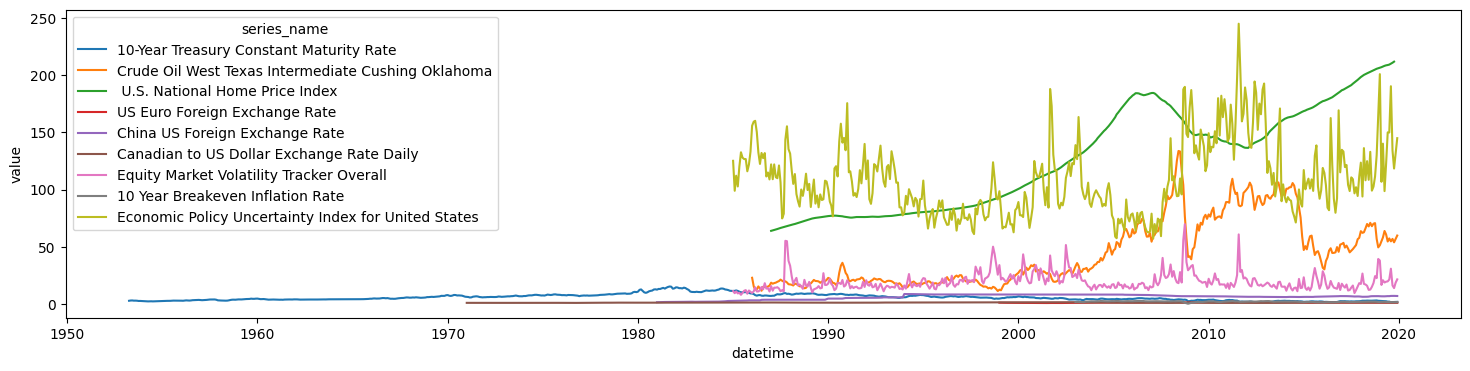

In [4]:
# @title Checking the Data
import seaborn as sns
plt.figure(figsize=(18, 4))  # Width x Height in inches

sns.lineplot(df_long, x='datetime', y='value', hue='series_name')

In [5]:
# @title split in test and train
df_long_train = df_long.sort_values(by=['series_id', 'datetime']).groupby('series_id').head(-8)
df_long_test = df_long.sort_values(by=['series_id', 'datetime']).groupby('series_id').tail(8)

In [6]:
# @title Run AutoTS auto-ml framework
from autots import AutoTS

model = AutoTS(
    forecast_length=16,
    # model_list="superfast",
    # transformer_list='superfast',
    frequency='infer',
    ensemble=['horizontal-max'],
    max_generations=10,
    # num_validations=0,
)
model = model.fit(df_long_train, date_col='datetime', value_col='value', id_col='series_id')

# Print the description of the best model
print(model)

Data frequency is: MS, used frequency is: MS
Model Number: 1 with model ARIMA in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model AverageValueNaive in generation 0 of 10
Model Number: 5 with model DatepartRegression in generation 0 of 10
Model Number: 6 with model DatepartRegression in generation 0 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Model Number: 7 with model DatepartRegression in generation 0 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 8 with model DatepartRegression in generation 0 of 10
Epoch 1/50
25/25 [==============================] - 8s 6ms/step - loss: 0.3782
Epoch 2/50
25/25 [==============================] - 0s 6ms/step - loss: 0.3776
Epoch 3/50
25/25 [==============================] - 0s 7ms/step - loss: 0.3774
Epoch 4/50
25/25 [==============================] - 0s 7ms/step - loss: 0.3774
Epoch 5/50
25/25 [==============================] - 0s 7ms/step - loss: 0.3773
Epoch 6/50
25/25 [==============================] - 0s 7ms/step - loss: 0.3773
Epoch 7/50
25/25 [==============================] - 0s 7ms/step - loss: 0.3772
Epoch 8/50
25/25 [==============================] - 0s 7ms/step - loss: 0.3772
Epoch 9/50
25/25 [==============================] - 0s 6ms/step - loss: 0.3775
Epoch 10/50
25/25 [==============================] - 0s 8ms/step - loss: 0.3772
Epoch 11/50
25/25 [==============================] - 0s 7ms/step - loss: 0.3773
Epoch 12/50
25/25 [==============================] - 0s 7ms/s

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 36 with model FBProphet in generation 0 of 10


DEBUG:cmdstanpy:input tempfile: /tmp/tmp9sjq092e/hv07w89n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9sjq092e/ajqj8wpc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83248', 'data', 'file=/tmp/tmp9sjq092e/hv07w89n.json', 'init=/tmp/tmp9sjq092e/ajqj8wpc.json', 'output', 'file=/tmp/tmp9sjq092e/prophet_modelsuj3tvkn/prophet_model-20231009174828.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:48:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:48:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 37 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation is incompatible with AutoTS. The numpy version is sometimes the issue, try 1.23.1 {as of 06-2023}') in model 37 in generation 0: GluonTS
Model Number: 38 with model MultivariateRegression in generation 0 of 10
Model Number: 39 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 39 in generation 0: MultivariateRegression
Model Number: 40 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 40 in generation 0: DatepartRegression
Model Number: 41 with model SeasonalNaive in generation 0 of 10
Model Number: 42 with model DatepartRegression in generation 0 of 10
Model Number: 43 with model UnobservedComponents in generation 0 of 10
Model Number: 44 with model UnobservedComponents 

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: overflow encountered in square
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:325: RuntimeWarning: divide by zero encountered in power
  return np.power(z, 1. / self.power)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:775: RuntimeWarning: invalid value encountered in divide
  resid_dev = -np.log(endog_mu) + (endog - mu) / mu
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:813: RuntimeWarning: invalid value encountered in divide
  return np.sum(resid / self.family.variance(mu)) / s

Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 67 in generation 0: GLM
Model Number: 68 with model ETS in generation 0 of 10
Model Number: 69 with model FBProphet in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 69 in generation 0: FBProphet
Model Number: 70 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation is incompatible with AutoTS. The numpy version is sometimes the issue, try 1.23.1 {as of 06-2023}') in model 70 in generation 0: GluonTS
Model Number: 71 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 71 in generation 0: UnobservedComponents
Model Number: 72 with model VAR in generation 0 of 10
Model Number: 73 with model VECM in generation 0 of 10
Model Number: 74 with model ARIMA in generation 0

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [17:49:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)


Model Number: 79 with model UnivariateMotif in generation 0 of 10
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill', 'transformations': {'0': 'AlignLastValue', '1': 'PowerTransformer', '2': 'SeasonalDifference'}, 'transformation_params': {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {}, '2': {'lag_1': 12, 'method': 'LastValue'}}}. fail_on_forecast_nan=True") in model 79 in generation 0: UnivariateMotif
Model Number: 80 with model MultivariateMotif in generation 0 of 10
Model Number: 81 with model SectionalMotif in generation 0 of 10
Model Number: 82 with model NVAR in generation 0 of 10
Template Eval Error: ValueError('Model NVAR returned NaN for one or more series. fail_on_forecast_nan=True') in model 82 in generation 0: NVAR
Model Number: 83 with model Theta in generation 0 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 83 in gen

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:2418: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 577513.9874291763, tolerance: 160.3113705002658
  ) = cd_fast.enet_coordinate_descent_multi_task(


Model Number: 115 with model ETS in generation 0 of 10
Model Number: 116 with model VAR in generation 0 of 10
Model Number: 117 with model UnobservedComponents in generation 0 of 10
Model Number: 118 with model WindowRegression in generation 0 of 10
Model Number: 119 with model MetricMotif in generation 0 of 10
Model Number: 120 with model ETS in generation 0 of 10
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 120 in generation 0: ETS
Model Number: 121 with model SectionalMotif in generation 0 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 121 in generation 0: SectionalMotif
Model Number: 122 with model MetricMotif in generation 0 of 10
Model Number: 123 with model GLS in generation 0 of 10
Model Number: 124 with model NVAR in generation 0 of 10
Model Number: 125 with model SeasonalNaive in generation 0 of 10
Model Number: 126 with model ARCH in generation 0 of 10
Template Eval Error: Imp

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:188: RuntimeWarning: invalid value encountered in divide
  return np.sum(resid_dev * freq_weights * var_weights / scale)


Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 129 in generation 0: WindowRegression
Model Number: 130 with model FBProphet in generation 0 of 10
Model Number: 131 with model GLM in generation 0 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 131 in generation 0: GLM
Model Number: 132 with model GLM in generation 0 of 10


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1243: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)


Model Number: 133 with model SeasonalNaive in generation 0 of 10
Model Number: 134 with model ConstantNaive in generation 0 of 10
Model Number: 135 with model ConstantNaive in generation 0 of 10
Model Number: 136 with model UnivariateMotif in generation 0 of 10
Model Number: 137 with model GLM in generation 0 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 137 in generation 0: GLM
Model Number: 138 with model MetricMotif in generation 0 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.38822e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 139 with model ARIMA in generation 0 of 10
Model Number: 140 with model Theta in generation 0 of 10
Model Number: 141 with model ConstantNaive in generation 0 of 10
Model Number: 142 with model MetricMotif in generation 0 of 10
Model Number: 143 with model ARDL in generation 0 of 10
Model Number: 144 with model DatepartRegression in generation 0 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 144 in generation 0: DatepartRegression
Model Number: 145 with model NVAR in generation 0 of 10
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'SeasonalityMotifImputer', 'transformations': {'0': 'AlignLastValue', '1': 'SeasonalDifference', '2': 'PowerTransformer', '3': 'PctChangeTransformer', '4': 'MaxAbsScaler', '5': 'SeasonalDifference'}, 'transformation_params': {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {'lag_1': 7, 'method': 'L

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 152 with model LastValueNaive in generation 0 of 10
Model Number: 153 with model DatepartRegression in generation 0 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Model Number: 154 with model MultivariateMotif in generation 0 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 155 with model SeasonalNaive in generation 0 of 10
Model Number: 156 with model VECM in generation 0 of 10
Model Number: 157 with model MultivariateMotif in generation 0 of 10
Model Number: 158 with model ARDL in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 158 in generation 0: ARDL
Model Number: 159 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 159 in generation 0: DatepartRegression
Model Number: 160 with model SeasonalNaive in generation 0 of 10
Model Number: 161 with model GLS in generation 0 of 10
Model Number: 162 with model SectionalMotif in generation 0 of 10
Model Number: 163 with model ARDL in generation 0 of 10
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 163 in generation 0: ARDL
Model Number: 164 with model VAR in generation 0 of 10
Model Numbe

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 184 in generation 0: GLM
Model Number: 185 with model ETS in generation 0 of 10
Model Number: 186 with model MetricMotif in generation 0 of 10
New Generation: 1 of 10
Model Number: 187 with model ETS in generation 1 of 10
ETS error ValueError('shapes (2,10) and (0,1) not aligned: 10 (dim 1) != 0 (dim 0)')
ETS failed on CSUSHPISA with ValueError('shapes (2,10) and (0,1) not aligned: 10 (dim 1) != 0 (dim 0)')
ETS error ValueError('shapes (2,10) and (0,1) not aligned: 10 (dim 1) != 0 (dim 0)')
ETS failed on EMVOVERALLEMV with ValueError('shapes (2,10) and (0,1) not aligned: 10 (dim 1) != 0 (dim 0)')
ETS error ValueError('shapes (2,10) and (0,1) not aligned: 10 (dim 1) != 0 (dim 0)')
ETS failed on EXCAUS with ValueError('shapes (2,10) and (0,1) not aligned: 10 (dim 1) != 0 (dim 0)')
ETS error ValueError('shapes (2,10) and (0,1) not aligned: 10 (dim 1) != 0 (dim 0)')
ETS failed on EXCHUS with ValueError(

/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))
/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))


Template Eval Error: ValueError('array must not contain infs or NaNs') in model 188 in generation 1: VAR
Model Number: 189 with model LastValueNaive in generation 1 of 10
Model Number: 190 with model ConstantNaive in generation 1 of 10
Model Number: 191 with model UnobservedComponents in generation 1 of 10
Model Number: 192 with model ConstantNaive in generation 1 of 10
Model Number: 193 with model AverageValueNaive in generation 1 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'rolling_mean', 'transformations': {'0': 'PowerTransformer', '1': 'RegressionFilter', '2': 'Detrend', '3': 'DifferencedTransformer', '4': 'Detrend', '5': 'AlignLastValue'}, 'transformation_params': {'0': {}, '1': {'sigma': 1.5, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'MLP', 'model_params': {'hidden_layer_sizes': [25, 15, 25], 'max_iter': 250, 'activation': 'relu', 'solver': 'adam', 'early_stopping': True, 'learning_rate_init': 1e-05}}, 'datepart_method': 'simple_binarized', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': True}, 'holiday_params': None}, '2': {'model': 'GLS', 'phi': 1, 'window': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'ClipOutliers'}, 'transformation_params': {'0': {'method': 'clip', 'std_threshold': 3}}}}, '3': {}, '4': {'model': 'GLS', 'phi': 0.998, 'window

/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))


Template Eval Error: ValueError('array must not contain infs or NaNs') in model 198 in generation 1: VAR
Model Number: 199 with model UnivariateMotif in generation 1 of 10
Model Number: 200 with model SectionalMotif in generation 1 of 10
Model Number: 201 with model ARIMA in generation 1 of 10
Template Eval Error: Exception('Transformer StandardScaler failed on fit') in model 201 in generation 1: ARIMA
Model Number: 202 with model SeasonalNaive in generation 1 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.38822e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 203 with model SeasonalNaive in generation 1 of 10
Model Number: 204 with model UnivariateRegression in generation 1 of 10
Model Number: 205 with model Theta in generation 1 of 10
Model Number: 206 with model FBProphet in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 206 in generation 1: FBProphet
Model Number: 207 with model SeasonalNaive in generation 1 of 10
Model Number: 208 with model SectionalMotif in generation 1 of 10
Model Number: 209 with model ARIMA in generation 1 of 10
Model Number: 210 with model ARIMA in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 210 in generation 1: ARIMA
Model Number: 211 with model Theta in generation 1 of 10
Model Number: 212 with model SeasonalNaive in generation 1 of 10
Model Number: 213 with model LastValueNaive in generation 1 of 10
Model Number: 214 with model UnobservedComponents in ge

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 247 with model VAR in generation 1 of 10
Model Number: 248 with model Theta in generation 1 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 248 in generation 1: Theta
Model Number: 249 with model ConstantNaive in generation 1 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 249 in generation 1: ConstantNaive
Model Number: 250 with model VECM in generation 1 of 10
Model Number: 251 with model UnivariateMotif in generation 1 of 10
Model Number: 252 with model VAR in generation 1 of 10
Model Number: 253 with model UnobservedComponents in generation 1 of 10
Model Number: 254 with model SeasonalNaive in generation 1 of 10
Model Number: 255 with model WindowRegression in generation 1 of 10
Model Number: 256 with model MetricMotif in generation 1 of 10
Model Number: 257 with model GLS in generation 1 of 10
Model Number: 258 with model ConstantNaive in generation 1 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:2418: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 577513.9874291763, tolerance: 160.3113705002658
  ) = cd_fast.enet_coordinate_descent_multi_task(


Model Number: 259 with model DatepartRegression in generation 1 of 10
Model Number: 260 with model LastValueNaive in generation 1 of 10
Model Number: 261 with model DatepartRegression in generation 1 of 10
Model Number: 262 with model ConstantNaive in generation 1 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:2418: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 226362.73199146986, tolerance: 14777.315538844383
  ) = cd_fast.enet_coordinate_descent_multi_task(


Model Number: 263 with model ETS in generation 1 of 10
Model Number: 264 with model SeasonalNaive in generation 1 of 10
Model Number: 265 with model GLS in generation 1 of 10
Model Number: 266 with model ARIMA in generation 1 of 10
Model Number: 267 with model VECM in generation 1 of 10


/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))


Template Eval Error: LinAlgError('SVD did not converge') in model 267 in generation 1: VECM
Model Number: 268 with model UnivariateRegression in generation 1 of 10
Model Number: 269 with model VAR in generation 1 of 10


/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))
/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))


Template Eval Error: ValueError('array must not contain infs or NaNs') in model 269 in generation 1: VAR
Model Number: 270 with model AverageValueNaive in generation 1 of 10
Model Number: 271 with model MultivariateMotif in generation 1 of 10
Model Number: 272 with model ETS in generation 1 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 272 in generation 1: ETS
Model Number: 273 with model VECM in generation 1 of 10
Model Number: 274 with model WindowRegression in generation 1 of 10
Model Number: 275 with model UnobservedComponents in generation 1 of 10
Model Number: 276 with model ARDL in generation 1 of 10
Model Number: 277 with model UnobservedComponents in generation 1 of 10
Model Number: 278 with model ETS in generation 1 of 10


/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))


Template Eval Error: ValueError('Model ETS returned NaN for one or more series. fail_on_forecast_nan=True') in model 278 in generation 1: ETS
Model Number: 279 with model AverageValueNaive in generation 1 of 10
Model Number: 280 with model VAR in generation 1 of 10
Model Number: 281 with model DatepartRegression in generation 1 of 10
Model Number: 282 with model LastValueNaive in generation 1 of 10
Model Number: 283 with model GLM in generation 1 of 10
Model Number: 284 with model ARIMA in generation 1 of 10
Model Number: 285 with model GLM in generation 1 of 10
Model Number: 286 with model UnobservedComponents in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 286 in generation 1: UnobservedComponents
Model Number: 287 with model FBProphet in generation 1 of 10


17:55:36 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
17:55:36 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
17:55:37 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
17:55:37 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
17:55:38 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
17:55:39 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Cha

Model Number: 288 with model VECM in generation 1 of 10
Model Number: 289 with model SectionalMotif in generation 1 of 10
Model Number: 290 with model ConstantNaive in generation 1 of 10
Model Number: 291 with model MultivariateMotif in generation 1 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:2418: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 553078.2953462732, tolerance: 221.58163557622234
  ) = cd_fast.enet_coordinate_descent_multi_task(


Model Number: 292 with model VAR in generation 1 of 10
Model Number: 293 with model UnobservedComponents in generation 1 of 10
Model Number: 294 with model VAR in generation 1 of 10
Model Number: 295 with model GLM in generation 1 of 10
Model Number: 296 with model LastValueNaive in generation 1 of 10
Model Number: 297 with model UnobservedComponents in generation 1 of 10
Model Number: 298 with model VECM in generation 1 of 10
Model Number: 299 with model VECM in generation 1 of 10
Model Number: 300 with model Theta in generation 1 of 10
Model Number: 301 with model SectionalMotif in generation 1 of 10
Model Number: 302 with model SeasonalNaive in generation 1 of 10
Model Number: 303 with model NVAR in generation 1 of 10
Model Number: 304 with model GLS in generation 1 of 10
Model Number: 305 with model ETS in generation 1 of 10
Model Number: 306 with model DatepartRegression in generation 1 of 10
Model Number: 307 with model MultivariateMotif in generation 1 of 10
Model Number: 308 wi

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Number: 329 with model ARDL in generation 2 of 10
Model Number: 330 with model AverageValueNaive in generation 2 of 10
Model Number: 331 with model LastValueNaive in generation 2 of 10
Model Number: 332 with model ARIMA in generation 2 of 10
Model Number: 333 with model ETS in generation 2 of 10
Model Number: 334 with model WindowRegression in generation 2 of 10
Model Number: 335 with model UnivariateMotif in generation 2 of 10
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 335 in generation 2: UnivariateMotif
Model Number: 336 with model VAR in generation 2 of 10
Model Number: 337 with model AverageValueNaive in generation 2 of 10
Model Number: 338 with model WindowRegression in generation 2 of 10
Model Number: 339 with model ARDL in generation 2 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.38822e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 340 with model NVAR in generation 2 of 10
Model Number: 341 with model WindowRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 341 in generation 2: WindowRegression
Model Number: 342 with model ETS in generation 2 of 10
Model Number: 343 with model UnobservedComponents in generation 2 of 10
Model Number: 344 with model MultivariateMotif in generation 2 of 10
Model Number: 345 with model SectionalMotif in generation 2 of 10
Model Number: 346 with model ARDL in generation 2 of 10
Model Number: 347 with model MetricMotif in generation 2 of 10
Model Number: 348 with model VAR in generation 2 of 10
Model Number: 349 with model ARIMA in generation 2 of 10
Model Number: 350 with model MultivariateMotif in generation 2 of 10
Model Number: 351 with model ARIMA in generation 2 of 10
Model Number: 352 with model GLS in generation 2 of 10
Model Number: 353 with model DatepartRegression in generation 2 of

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.38822e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 413 with model ARIMA in generation 2 of 10
Model Number: 414 with model Theta in generation 2 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 414 in generation 2: Theta
Model Number: 415 with model LastValueNaive in generation 2 of 10
Model Number: 416 with model ARIMA in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 416 in generation 2: ARIMA
Model Number: 417 with model ARDL in generation 2 of 10
Model Number: 418 with model FBProphet in generation 2 of 10
Model Number: 419 with model ARDL in generation 2 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.38822e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 420 with model UnivariateMotif in generation 2 of 10
Model Number: 421 with model GLS in generation 2 of 10
Model Number: 422 with model AverageValueNaive in generation 2 of 10
Model Number: 423 with model MultivariateMotif in generation 2 of 10
Model Number: 424 with model ETS in generation 2 of 10
Model Number: 425 with model GLM in generation 2 of 10
Model Number: 426 with model LastValueNaive in generation 2 of 10
Model Number: 427 with model ETS in generation 2 of 10
Model Number: 428 with model MultivariateMotif in generation 2 of 10
Model Number: 429 with model ARIMA in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 429 in generation 2: ARIMA
Model Number: 430 with model MultivariateRegression in generation 2 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Number: 431 with model AverageValueNaive in generation 2 of 10
Model Number: 432 with model WindowRegression in generation 2 of 10
Model Number: 433 with model ARDL in generation 2 of 10
Model Number: 434 with model VAR in generation 2 of 10
Model Number: 435 with model ConstantNaive in generation 2 of 10
Model Number: 436 with model MultivariateRegression in generation 2 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


New Generation: 3 of 10
Model Number: 437 with model Theta in generation 3 of 10
Model Number: 438 with model UnivariateMotif in generation 3 of 10
Model Number: 439 with model UnivariateRegression in generation 3 of 10
Model Number: 440 with model NVAR in generation 3 of 10
Model Number: 441 with model VAR in generation 3 of 10
Model Number: 442 with model WindowRegression in generation 3 of 10
Epoch 1/100
313/313 [==============================] - 7s 5ms/step - loss: 0.0301
Epoch 2/100
313/313 [==============================] - 2s 5ms/step - loss: 0.0174
Epoch 3/100
313/313 [==============================] - 2s 5ms/step - loss: 0.0154
Epoch 4/100
313/313 [==============================] - 2s 5ms/step - loss: 0.0146
Epoch 5/100
313/313 [==============================] - 2s 5ms/step - loss: 0.0143
Epoch 6/100
313/313 [==============================] - 2s 7ms/step - loss: 0.0138
Epoch 7/100
313/313 [==============================] - 2s 7ms/step - loss: 0.0136
Epoch 8/100
313/313 [======

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:2418: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 553078.2953462732, tolerance: 221.58163557622234
  ) = cd_fast.enet_coordinate_descent_multi_task(


Model Number: 451 with model NVAR in generation 3 of 10
Model Number: 452 with model UnobservedComponents in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 452 in generation 3: UnobservedComponents
Model Number: 453 with model ETS in generation 3 of 10
Model Number: 454 with model VAR in generation 3 of 10
Model Number: 455 with model ARDL in generation 3 of 10
Model Number: 456 with model MultivariateMotif in generation 3 of 10
Model Number: 457 with model NVAR in generation 3 of 10
Model Number: 458 with model GLM in generation 3 of 10
Model Number: 459 with model SectionalMotif in generation 3 of 10
Model Number: 460 with model MetricMotif in generation 3 of 10
Model Number: 461 with model LastValueNaive in generation 3 of 10
Model Number: 462 with model SeasonalNaive in generation 3 of 10
Model Number: 463 with model NVAR in generation 3 of 10
Model Number: 464 with model GLS in generation 3 of 10
Model Number:

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Number: 505 with model MultivariateMotif in generation 3 of 10
Model Number: 506 with model AverageValueNaive in generation 3 of 10
Model Number: 507 with model VAR in generation 3 of 10
Model Number: 508 with model SectionalMotif in generation 3 of 10
Model Number: 509 with model SeasonalNaive in generation 3 of 10
Model Number: 510 with model ARIMA in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 510 in generation 3: ARIMA
Model Number: 511 with model MetricMotif in generation 3 of 10
Model Number: 512 with model NVAR in generation 3 of 10
Model Number: 513 with model WindowRegression in generation 3 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Template Eval Error: ValueError('Input X contains NaN.\nRadiusNeighborsRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values') in model 513 in generation 3: WindowRegression
Model Number: 514 with model FBProphet in generation 3 of 10


18:30:33 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
18:30:34 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
18:30:35 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
18:30:37 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
18:30:39 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


Model Number: 515 with model MetricMotif in generation 3 of 10
Model Number: 516 with model MultivariateRegression in generation 3 of 10
Model Number: 517 with model UnobservedComponents in generation 3 of 10
Model Number: 518 with model MultivariateMotif in generation 3 of 10
Template Eval Error: ValueError('Unknown Distance Metric: kulsinski') in model 518 in generation 3: MultivariateMotif
Model Number: 519 with model WindowRegression in generation 3 of 10
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'rolling_mean_24', 'transformations': {'0': 'RobustScaler', '1': 'RollingMean100thN', '2': 'PowerTransformer'}, 'transformation_params': {'0': {}, '1': {}, '2': {}}}. fail_on_forecast_nan=True") in model 519 in generation 3: WindowRegression
Model Number: 520 with model DatepartRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 520 in generation 3: Datepar

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.38822e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 602 with model NVAR in generation 4 of 10
Template Eval Error: ValueError('Model NVAR returned NaN for one or more series. fail_on_forecast_nan=True') in model 602 in generation 4: NVAR
Model Number: 603 with model MultivariateMotif in generation 4 of 10
Model Number: 604 with model Theta in generation 4 of 10
Model Number: 605 with model VECM in generation 4 of 10
Model Number: 606 with model Theta in generation 4 of 10
Model Number: 607 with model ARDL in generation 4 of 10
Model Number: 608 with model Theta in generation 4 of 10
Model Number: 609 with model UnobservedComponents in generation 4 of 10


/usr/local/lib/python3.10/dist-packages/autots/models/sklearn.py:3242: RuntimeWarning: overflow encountered in exp
  return np.exp(-gamma * distance)
/usr/local/lib/python3.10/dist-packages/autots/models/sklearn.py:3242: RuntimeWarning: overflow encountered in exp
  return np.exp(-gamma * distance)
/usr/local/lib/python3.10/dist-packages/autots/models/sklearn.py:3305: RuntimeWarning: invalid value encountered in matmul
  Y_pred = k @ self.alpha
/usr/local/lib/python3.10/dist-packages/autots/models/sklearn.py:3242: RuntimeWarning: overflow encountered in exp
  return np.exp(-gamma * distance)
/usr/local/lib/python3.10/dist-packages/autots/models/sklearn.py:3305: RuntimeWarning: invalid value encountered in matmul
  Y_pred = k @ self.alpha


Model Number: 610 with model UnivariateMotif in generation 4 of 10
Model Number: 611 with model ARIMA in generation 4 of 10
Model Number: 612 with model MultivariateMotif in generation 4 of 10
Model Number: 613 with model AverageValueNaive in generation 4 of 10
Model Number: 614 with model Theta in generation 4 of 10
Model Number: 615 with model LastValueNaive in generation 4 of 10
Model Number: 616 with model NVAR in generation 4 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 616 in generation 4: NVAR
Model Number: 617 with model UnivariateRegression in generation 4 of 10
Model Number: 618 with model LastValueNaive in generation 4 of 10
Model Number: 619 with model VAR in generation 4 of 10
Model Number: 620 with model NVAR in generation 4 of 10
Model Number: 621 with model UnobservedComponents in generation 4 of 10
Model Number: 622 with model DatepartRegression in generation 4 of 10
Model Number: 623 with model Theta in generation 4 of 

/usr/local/lib/python3.10/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: divide by zero encountered in divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.10/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/usr/local/lib/python3.10/dist-packages/autots/tools/probabilistic.py:66: RuntimeWarning: invalid value encountered in divide
  post_mu = (


Model Number: 628 with model NVAR in generation 4 of 10
Model Number: 629 with model Theta in generation 4 of 10
Model Number: 630 with model MultivariateMotif in generation 4 of 10
Model Number: 631 with model VECM in generation 4 of 10
Model Number: 632 with model Theta in generation 4 of 10
Model Number: 633 with model VAR in generation 4 of 10
Model Number: 634 with model ARDL in generation 4 of 10
Model Number: 635 with model UnobservedComponents in generation 4 of 10
Model Number: 636 with model UnivariateMotif in generation 4 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 636 in generation 4: UnivariateMotif
Model Number: 637 with model ARDL in generation 4 of 10
Model Number: 638 with model Theta in generation 4 of 10
Model Number: 639 with model VAR in generation 4 of 10
Model Number: 640 with model SeasonalNaive in generation 4 of 10
Model Number: 641 with model GLS in generation 4 of 10
Model Number: 642 with model SeasonalNaive in generat

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 644 with model LastValueNaive in generation 4 of 10
Model Number: 645 with model SectionalMotif in generation 4 of 10
Model Number: 646 with model VAR in generation 4 of 10
Model Number: 647 with model DatepartRegression in generation 4 of 10
Model Number: 648 with model MultivariateMotif in generation 4 of 10
Model Number: 649 with model FBProphet in generation 4 of 10
Model Number: 650 with model Theta in generation 4 of 10
Model Number: 651 with model ETS in generation 4 of 10
Model Number: 652 with model ConstantNaive in generation 4 of 10
Model Number: 653 with model ARDL in generation 4 of 10
Model Number: 654 with model UnobservedComponents in generation 4 of 10
Model Number: 655 with model LastValueNaive in generation 4 of 10
Model Number: 656 with model NVAR in generation 4 of 10
Model Number: 657 with model SectionalMotif in generation 4 of 10
Model Number: 658 with model MetricMotif in generation 4 of 10
Model Number: 659 with model ARIMA in generation 4 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Number: 670 with model GLS in generation 4 of 10
Model Number: 671 with model ARDL in generation 4 of 10
Model Number: 672 with model MetricMotif in generation 4 of 10
Model Number: 673 with model SectionalMotif in generation 4 of 10
Model Number: 674 with model LastValueNaive in generation 4 of 10
Model Number: 675 with model WindowRegression in generation 4 of 10
Model Number: 676 with model ARDL in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 676 in generation 4: ARDL
Model Number: 677 with model AverageValueNaive in generation 4 of 10
Model Number: 678 with model UnivariateMotif in generation 4 of 10
Model Number: 679 with model ARDL in generation 4 of 10
Model Number: 680 with model ETS in generation 4 of 10
Model Number: 681 with model MultivariateMotif in generation 4 of 10
Model Number: 682 with model UnobservedComponents in generation 4 of 10
Template Eval Error: ValueError("regression_type='User'

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 700 with model ConstantNaive in generation 5 of 10
Model Number: 701 with model NVAR in generation 5 of 10
Model Number: 702 with model ARDL in generation 5 of 10
Model Number: 703 with model GLS in generation 5 of 10
Model Number: 704 with model MultivariateMotif in generation 5 of 10
Template Eval Error: ValueError('Unknown Distance Metric: kulsinski') in model 704 in generation 5: MultivariateMotif
Model Number: 705 with model DatepartRegression in generation 5 of 10
Model Number: 706 with model MultivariateMotif in generation 5 of 10
Model Number: 707 with model SectionalMotif in generation 5 of 10
Model Number: 708 with model UnivariateMotif in generation 5 of 10
Model Number: 709 with model NVAR in generation 5 of 10
Model Number: 710 with model ARIMA in generation 5 of 10
Model Number: 711 with model MultivariateMotif in generation 5 of 10
Model Number: 712 with model MultivariateMotif in generation 5 of 10
Model Number: 713 with model Theta in generation 5 of 10
M

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 721 with model MultivariateMotif in generation 5 of 10
Model Number: 722 with model ARIMA in generation 5 of 10
Model Number: 723 with model ARDL in generation 5 of 10
Model Number: 724 with model GLS in generation 5 of 10
Model Number: 725 with model SectionalMotif in generation 5 of 10
Model Number: 726 with model Theta in generation 5 of 10
Model Number: 727 with model UnivariateMotif in generation 5 of 10
Model Number: 728 with model SeasonalNaive in generation 5 of 10
Model Number: 729 with model VAR in generation 5 of 10
Model Number: 730 with model VECM in generation 5 of 10
Model Number: 731 with model ETS in generation 5 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on CSUSHPISA with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal comp

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Model Number: 733 with model ARDL in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 733 in generation 5: ARDL
Model Number: 734 with model UnobservedComponents in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 734 in generation 5: UnobservedComponents
Model Number: 735 with model GLS in generation 5 of 10
Model Number: 736 with model MetricMotif in generation 5 of 10
Model Number: 737 with model ConstantNaive in generation 5 of 10
Model Number: 738 with model UnobservedComponents in generation 5 of 10
Model Number: 739 with model Theta in generation 5 of 10
Model Number: 740 with model UnobservedComponents in generation 5 of 10
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 740 in generation 5: UnobservedComponents
Model Number: 741 with model GLS in generation 5 of 10
Model Number: 742 with model VAR in g

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Template Eval Error: Exception('Transformer DatepartRegression failed on inverse') in model 756 in generation 5: UnivariateMotif
Model Number: 757 with model ConstantNaive in generation 5 of 10
Model Number: 758 with model ConstantNaive in generation 5 of 10
Model Number: 759 with model GLS in generation 5 of 10
Model Number: 760 with model ETS in generation 5 of 10
Model Number: 761 with model VECM in generation 5 of 10
Model Number: 762 with model DatepartRegression in generation 5 of 10
Model Number: 763 with model VAR in generation 5 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 764 with model ARDL in generation 5 of 10
Model Number: 765 with model SectionalMotif in generation 5 of 10
Model Number: 766 with model ARDL in generation 5 of 10
Model Number: 767 with model VAR in generation 5 of 10
Model Number: 768 with model AverageValueNaive in generation 5 of 10
Model Number: 769 with model SectionalMotif in generation 5 of 10
Model Number: 770 with model LastValueNaive in generation 5 of 10
Model Number: 771 with model ETS in generation 5 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.38822e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 772 with model LastValueNaive in generation 5 of 10
Model Number: 773 with model SectionalMotif in generation 5 of 10
Model Number: 774 with model NVAR in generation 5 of 10
Model Number: 775 with model LastValueNaive in generation 5 of 10
Model Number: 776 with model AverageValueNaive in generation 5 of 10
Model Number: 777 with model UnivariateRegression in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 777 in generation 5: UnivariateRegression
Model Number: 778 with model LastValueNaive in generation 5 of 10
Model Number: 779 with model UnobservedComponents in generation 5 of 10
Model Number: 780 with model MultivariateMotif in generation 5 of 10
Model Number: 781 with model ARIMA in generation 5 of 10
Model Number: 782 with model ARIMA in generation 5 of 10
Model Number: 783 with model UnivariateMotif in generation 5 of 10
Model Number: 784 with model MultivariateMotif in generation 5 of 10
Temp

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 792 with model ARDL in generation 6 of 10
Model Number: 793 with model NVAR in generation 6 of 10
Model Number: 794 with model Theta in generation 6 of 10
Model Number: 795 with model UnobservedComponents in generation 6 of 10
Model Number: 796 with model MetricMotif in generation 6 of 10
Model Number: 797 with model UnivariateRegression in generation 6 of 10
Model Number: 798 with model MultivariateMotif in generation 6 of 10
Model Number: 799 with model DatepartRegression in generation 6 of 10
Model Number: 800 with model VAR in generation 6 of 10
Model Number: 801 with model ConstantNaive in generation 6 of 10
Model Number: 802 with model UnivariateMotif in generation 6 of 10
Model Number: 803 with model UnivariateRegression in generation 6 of 10
Model Number: 804 with model LastValueNaive in generation 6 of 10
Model Number: 805 with model MultivariateMotif in generation 6 of 10
Model Number: 806 with model SeasonalNaive in generation 6 of 10
Model Number: 807 with mod

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 840 with model ETS in generation 6 of 10
Model Number: 841 with model SectionalMotif in generation 6 of 10
Model Number: 842 with model Theta in generation 6 of 10
Model Number: 843 with model ARIMA in generation 6 of 10
Model Number: 844 with model VAR in generation 6 of 10
Model Number: 845 with model Theta in generation 6 of 10
Model Number: 846 with model LastValueNaive in generation 6 of 10
Model Number: 847 with model UnobservedComponents in generation 6 of 10
Model Number: 848 with model Theta in generation 6 of 10
Model Number: 849 with model DatepartRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 849 in generation 6: DatepartRegression
Model Number: 850 with model ARDL in generation 6 of 10
Model Number: 851 with model Theta in generation 6 of 10
Model Number: 852 with model ARIMA in generation 6 of 10
Model Number: 853 with model ARDL in generation 6 of 10
Model Number: 854 with m

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Model Number: 863 with model NVAR in generation 6 of 10
Model Number: 864 with model GLS in generation 6 of 10
Model Number: 865 with model SectionalMotif in generation 6 of 10
Model Number: 866 with model ARDL in generation 6 of 10
Model Number: 867 with model SectionalMotif in generation 6 of 10
Model Number: 868 with model SectionalMotif in generation 6 of 10
Model Number: 869 with model ConstantNaive in generation 6 of 10
Model Number: 870 with model ETS in generation 6 of 10
Model Number: 871 with model ConstantNaive in generation 6 of 10
Model Number: 872 with model Theta in generation 6 of 10
Model Number: 873 with model MultivariateMotif in generation 6 of 10
Model Number: 874 with model Theta in generation 6 of 10
Model Number: 875 with model LastValueNaive in generation 6 of 10
Model Number: 876 with model UnivariateMotif in generation 6 of 10
Model Number: 877 with model SeasonalNaive in generation 6 of 10
Model Number: 878 with model VAR in generation 6 of 10
Model Number: 

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:583: UserWarning: Ignoring n_components with whiten=False.
  warnings.warn("Ignoring n_components with whiten=False.")
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:154: RuntimeWarning: overflow encountered in power
  return x**3, (3 * x**2).mean(axis=-1)
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:113: RuntimeWarning: overflow encountered in multiply
  W1 = _sym_decorrelation(np.dot(gwtx, X.T) / p_ - g_wtx[:, np.newaxis] * W)


Model Number: 916 with model ARIMA in generation 7 of 10
Model Number: 917 with model VECM in generation 7 of 10
Model Number: 918 with model SectionalMotif in generation 7 of 10
Model Number: 919 with model UnivariateMotif in generation 7 of 10
Model Number: 920 with model LastValueNaive in generation 7 of 10
Model Number: 921 with model UnivariateRegression in generation 7 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:2418: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6698.376805358115, tolerance: 602.9746240568027
  ) = cd_fast.enet_coordinate_descent_multi_task(


Model Number: 922 with model MultivariateMotif in generation 7 of 10
Model Number: 923 with model UnobservedComponents in generation 7 of 10
Model Number: 924 with model SectionalMotif in generation 7 of 10
Model Number: 925 with model VAR in generation 7 of 10
Model Number: 926 with model ARDL in generation 7 of 10
Model Number: 927 with model ConstantNaive in generation 7 of 10
Model Number: 928 with model UnivariateMotif in generation 7 of 10
Model Number: 929 with model UnivariateMotif in generation 7 of 10
Model Number: 930 with model VAR in generation 7 of 10
Model Number: 931 with model UnobservedComponents in generation 7 of 10
Model Number: 932 with model VAR in generation 7 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 932 in generation 7: VAR
Model Number: 933 with model SectionalMotif in generation 7 of 10
Model Number: 934 with model UnobservedComponents in generation 7 of 10
Model Number: 935 with model NVAR in generation 7 of 10
Model

/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:966: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


Template Eval Error: Exception('Transformer Detrend failed on fit') in model 959 in generation 7: ETS
Model Number: 960 with model VAR in generation 7 of 10
Model Number: 961 with model UnivariateMotif in generation 7 of 10
Template Eval Error: Exception('Transformer DatepartRegression failed on inverse') in model 961 in generation 7: UnivariateMotif
Model Number: 962 with model MultivariateMotif in generation 7 of 10
Model Number: 963 with model AverageValueNaive in generation 7 of 10
Model Number: 964 with model ConstantNaive in generation 7 of 10
Model Number: 965 with model ARIMA in generation 7 of 10
Model Number: 966 with model MultivariateMotif in generation 7 of 10
Model Number: 967 with model LastValueNaive in generation 7 of 10
Model Number: 968 with model ARDL in generation 7 of 10
Model Number: 969 with model NVAR in generation 7 of 10
Model Number: 970 with model ARDL in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not sup

/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))


Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 1029 in generation 8: AverageValueNaive
Model Number: 1030 with model MetricMotif in generation 8 of 10
Model Number: 1031 with model ARDL in generation 8 of 10
Model Number: 1032 with model Theta in generation 8 of 10
Model Number: 1033 with model SeasonalNaive in generation 8 of 10
Model Number: 1034 with model ARDL in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1034 in generation 8: ARDL
Model Number: 1035 with model UnivariateRegression in generation 8 of 10
Model Number: 1036 with model ARDL in generation 8 of 10
Model Number: 1037 with model ETS in generation 8 of 10
Model Number: 1038 with model UnobservedComponents in generation 8 of 10
Model Number: 1039 with model SeasonalNaive in generation 8 of 10
Model Number: 1040 with model MultivariateMotif in generation 8 of 10
Model Number: 1041 with model AverageValueNaive in

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Template Eval Error: Exception('Transformer DatepartRegression failed on inverse') in model 1062 in generation 8: GLS
Model Number: 1063 with model ARIMA in generation 8 of 10
Model Number: 1064 with model NVAR in generation 8 of 10
Model Number: 1065 with model VAR in generation 8 of 10
Model Number: 1066 with model ConstantNaive in generation 8 of 10
Model Number: 1067 with model NVAR in generation 8 of 10
Model Number: 1068 with model ETS in generation 8 of 10
Model Number: 1069 with model UnobservedComponents in generation 8 of 10
Model Number: 1070 with model Theta in generation 8 of 10
Model Number: 1071 with model ARDL in generation 8 of 10
Model Number: 1072 with model UnivariateMotif in generation 8 of 10
Model Number: 1073 with model AverageValueNaive in generation 8 of 10
Model Number: 1074 with model VAR in generation 8 of 10
Model Number: 1075 with model ARDL in generation 8 of 10
Model Number: 1076 with model ARIMA in generation 8 of 10
Model Number: 1077 with model ARIMA

/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))


Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 1085 in generation 8: SeasonalNaive
Model Number: 1086 with model NVAR in generation 8 of 10
New Generation: 9 of 10
Model Number: 1087 with model GLS in generation 9 of 10
Model Number: 1088 with model UnivariateMotif in generation 9 of 10
Model Number: 1089 with model LastValueNaive in generation 9 of 10
Model Number: 1090 with model ARDL in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1090 in generation 9: ARDL
Model Number: 1091 with model VAR in generation 9 of 10
Template Eval Error: IndexError('tuple index out of range') in model 1091 in generation 9: VAR
Model Number: 1092 with model ARIMA in generation 9 of 10
Model Number: 1093 with model NVAR in generation 9 of 10
Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 1093 in generation 9: NVAR
Model Number: 1094 with model MultivariateM

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Model Number: 1105 with model ETS in generation 9 of 10
Model Number: 1106 with model AverageValueNaive in generation 9 of 10
Model Number: 1107 with model ARDL in generation 9 of 10
Model Number: 1108 with model AverageValueNaive in generation 9 of 10
Model Number: 1109 with model Theta in generation 9 of 10
Model Number: 1110 with model SectionalMotif in generation 9 of 10
Model Number: 1111 with model Theta in generation 9 of 10
Model Number: 1112 with model MetricMotif in generation 9 of 10
Model Number: 1113 with model SectionalMotif in generation 9 of 10
Model Number: 1114 with model SectionalMotif in generation 9 of 10
Model Number: 1115 with model Theta in generation 9 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1115 in generation 9: Theta
Model Number: 1116 with model Theta in generation 9 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 1117 with model AverageValueNaive in generation 9 of 10
Model Number: 1118 with model ConstantNaive in generation 9 of 10
Model Number: 1119 with model MetricMotif in generation 9 of 10
Model Number: 1120 with model UnobservedComponents in generation 9 of 10
Template Eval Error: LinAlgError('Singular matrix') in model 1120 in generation 9: UnobservedComponents
Model Number: 1121 with model VAR in generation 9 of 10
Model Number: 1122 with model MetricMotif in generation 9 of 10
Model Number: 1123 with model ARIMA in generation 9 of 10
Model Number: 1124 with model LastValueNaive in generation 9 of 10
Model Number: 1125 with model UnivariateMotif in generation 9 of 10
Model Number: 1126 with model NVAR in generation 9 of 10
Model Number: 1127 with model GLS in generation 9 of 10
Template Eval Error: Exception('Transformer AnomalyRemoval failed on fit') in model 1127 in generation 9: GLS
Model Number: 1128 with model ARDL in generation 9 of 10
Model Number: 1129 with model 

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 1138 with model VAR in generation 9 of 10
Model Number: 1139 with model UnobservedComponents in generation 9 of 10
Model Number: 1140 with model MetricMotif in generation 9 of 10
Model Number: 1141 with model ETS in generation 9 of 10


/usr/local/lib/python3.10/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.10/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: divide by zero encountered in divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.10/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 1142 with model DatepartRegression in generation 9 of 10
Model Number: 1143 with model ARIMA in generation 9 of 10
Template Eval Error: Exception('Transformer DatepartRegression failed on inverse') in model 1143 in generation 9: ARIMA
Model Number: 1144 with model UnivariateMotif in generation 9 of 10
Model Number: 1145 with model VAR in generation 9 of 10
Template Eval Error: Exception('Transformer QuantileTransformer failed on fit') in model 1145 in generation 9: VAR
Model Number: 1146 with model ETS in generation 9 of 10
Model Number: 1147 with model AverageValueNaive in generation 9 of 10
Model Number: 1148 with model UnobservedComponents in generation 9 of 10
Model Number: 1149 with model SeasonalNaive in generation 9 of 10
Model Number: 1150 with model UnivariateRegression in generation 9 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:2418: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39989.50240242463, tolerance: 1914.792708528571
  ) = cd_fast.enet_coordinate_descent_multi_task(


Model Number: 1151 with model NVAR in generation 9 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Model Number: 1152 with model UnivariateMotif in generation 9 of 10
Model Number: 1153 with model MultivariateMotif in generation 9 of 10
Model Number: 1154 with model GLS in generation 9 of 10
Model Number: 1155 with model MultivariateMotif in generation 9 of 10
Model Number: 1156 with model AverageValueNaive in generation 9 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 1156 in generation 9: AverageValueNaive
Model Number: 1157 with model NVAR in generation 9 of 10
Model Number: 1158 with model SectionalMotif in generation 9 of 10
Model Number: 1159 with model GLS in generation 9 of 10
Model Number: 1160 with model VAR in generation 9 of 10
Model Number: 1161 with model SectionalMotif in generation 9 of 10
Model Number: 1162 with model FBProphet in generation 9 of 10
Model Number: 1163 with model NVAR in generation 9 of 10
Model Number: 1164 with model Theta in generation 9 of 10
Model Number: 1165 with model LastValueNaive in generation 9 of 10
Mo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Template Eval Error: ValueError('Unknown Distance Metric: kulsinski') in model 1192 in generation 10: UnivariateMotif
Model Number: 1193 with model VAR in generation 10 of 10
Model Number: 1194 with model MetricMotif in generation 10 of 10
Model Number: 1195 with model ARIMA in generation 10 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 1195 in generation 10: ARIMA
Model Number: 1196 with model Theta in generation 10 of 10
Model Number: 1197 with model MetricMotif in generation 10 of 10
Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 1197 in generation 10: MetricMotif
Model Number: 1198 with model UnivariateMotif in generation 10 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1198 in generation 10: UnivariateMotif
Model Number: 1199 with model VAR in generation 10 of 10
Model Number: 1200 with model UnivariateMotif in generation 10 of 10
Model Number: 1201 with mode

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 1219 with model MultivariateMotif in generation 10 of 10
Model Number: 1220 with model Theta in generation 10 of 10
Model Number: 1221 with model MultivariateMotif in generation 10 of 10
Model Number: 1222 with model VAR in generation 10 of 10
Model Number: 1223 with model ARDL in generation 10 of 10
Model Number: 1224 with model ARIMA in generation 10 of 10
Model Number: 1225 with model ARIMA in generation 10 of 10
Model Number: 1226 with model ARDL in generation 10 of 10
Model Number: 1227 with model MultivariateMotif in generation 10 of 10
Model Number: 1228 with model ARDL in generation 10 of 10
Model Number: 1229 with model VAR in generation 10 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1229 in generation 10: VAR
Model Number: 1230 with model ARIMA in generation 10 of 10
Model Number: 1231 with model LastValueNaive in generation 10 of 10
Model Number: 1232 with model VAR in generation 10 of 10
Model Number: 1233 with

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.38822e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1253 with model MetricMotif in generation 10 of 10
Model Number: 1254 with model Theta in generation 10 of 10
Model Number: 1255 with model Theta in generation 10 of 10
Model Number: 1256 with model ARDL in generation 10 of 10
Model Number: 1257 with model UnobservedComponents in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 1257 in generation 10: UnobservedComponents
Model Number: 1258 with model Theta in generation 10 of 10
Model Number: 1259 with model AverageValueNaive in generation 10 of 10
Model Number: 1260 with model ConstantNaive in generation 10 of 10
Model Number: 1261 with model MultivariateMotif in generation 10 of 10
TotalRuntime missing in 11!
Validation Round: 1
Model Number: 1 of 207 with model ARDL for Validation 1
📈 1 - ARDL with avg smape 12.75: 
Model Number: 2 of 207 with model ARDL for Validation 1
2 - ARDL with avg smape 14.76: 
Model Number: 3 of 207 with model ARDL for Vali

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:2418: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4963.475161672657, tolerance: 563.3937878004656
  ) = cd_fast.enet_coordinate_descent_multi_task(


147 - UnivariateRegression with avg smape 12.56: 
Model Number: 148 of 207 with model UnivariateRegression for Validation 1
148 - UnivariateRegression with avg smape 16.99: 
Model Number: 149 of 207 with model VECM for Validation 1
149 - VECM with avg smape 88.31: 
Model Number: 150 of 207 with model VECM for Validation 1
150 - VECM with avg smape 15.56: 
Model Number: 151 of 207 with model VECM for Validation 1
151 - VECM with avg smape 18.11: 
Model Number: 152 of 207 with model VECM for Validation 1
152 - VECM with avg smape 18.43: 
Model Number: 153 of 207 with model WindowRegression for Validation 1
153 - WindowRegression with avg smape 18.24: 
Model Number: 154 of 207 with model SeasonalNaive for Validation 1
154 - SeasonalNaive with avg smape 14.81: 
Model Number: 155 of 207 with model SeasonalNaive for Validation 1
155 - SeasonalNaive with avg smape 14.89: 
Model Number: 156 of 207 with model SeasonalNaive for Validation 1
156 - SeasonalNaive with avg smape 17.82: 
Model Number

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:2418: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26528.410385317766, tolerance: 1694.4508826568217
  ) = cd_fast.enet_coordinate_descent_multi_task(


171 - UnivariateRegression with avg smape 13.86: 
Model Number: 172 of 207 with model MultivariateRegression for Validation 1
172 - MultivariateRegression with avg smape 19.92: 
Model Number: 173 of 207 with model FBProphet for Validation 1
173 - FBProphet with avg smape 21.04: 
Model Number: 174 of 207 with model UnivariateRegression for Validation 1
174 - UnivariateRegression with avg smape 11.64: 
Model Number: 175 of 207 with model WindowRegression for Validation 1
175 - WindowRegression with avg smape 15.64: 
Model Number: 176 of 207 with model UnivariateRegression for Validation 1
176 - UnivariateRegression with avg smape 16.3: 
Model Number: 177 of 207 with model UnivariateRegression for Validation 1
177 - UnivariateRegression with avg smape 18.06: 
Model Number: 178 of 207 with model GLM for Validation 1
178 - GLM with avg smape 14.41: 
Model Number: 179 of 207 with model WindowRegression for Validation 1
179 - WindowRegression with avg smape 14.03: 
Model Number: 180 of 207 wi

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:2418: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7201.108661104357, tolerance: 1717.5121657972534
  ) = cd_fast.enet_coordinate_descent_multi_task(


187 - UnivariateRegression with avg smape 16.27: 
Model Number: 188 of 207 with model WindowRegression for Validation 1
188 - WindowRegression with avg smape 14.75: 
Model Number: 189 of 207 with model WindowRegression for Validation 1
189 - WindowRegression with avg smape 32.47: 
Model Number: 190 of 207 with model VAR for Validation 1
190 - VAR with avg smape 20.99: 
Model Number: 191 of 207 with model NVAR for Validation 1
191 - NVAR with avg smape 20.09: 
Model Number: 192 of 207 with model MultivariateMotif for Validation 1
192 - MultivariateMotif with avg smape 26.5: 
Model Number: 193 of 207 with model NVAR for Validation 1
193 - NVAR with avg smape 19.67: 
Model Number: 194 of 207 with model UnivariateMotif for Validation 1
194 - UnivariateMotif with avg smape 13.93: 
Model Number: 195 of 207 with model NVAR for Validation 1
📈 195 - NVAR with avg smape 9.36: 
Model Number: 196 of 207 with model MultivariateMotif for Validation 1
196 - MultivariateMotif with avg smape 14.04: 
Mo

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:2418: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6099.8329600376455, tolerance: 539.6510225519752
  ) = cd_fast.enet_coordinate_descent_multi_task(


147 - UnivariateRegression with avg smape 22.15: 
Model Number: 148 of 207 with model UnivariateRegression for Validation 2
148 - UnivariateRegression with avg smape 22.75: 
Model Number: 149 of 207 with model VECM for Validation 2
149 - VECM with avg smape 79.95: 
Model Number: 150 of 207 with model VECM for Validation 2
150 - VECM with avg smape 21.32: 
Model Number: 151 of 207 with model VECM for Validation 2
151 - VECM with avg smape 25.56: 
Model Number: 152 of 207 with model VECM for Validation 2
152 - VECM with avg smape 26.38: 
Model Number: 153 of 207 with model WindowRegression for Validation 2
153 - WindowRegression with avg smape 14.26: 
Model Number: 154 of 207 with model SeasonalNaive for Validation 2
154 - SeasonalNaive with avg smape 13.87: 
Model Number: 155 of 207 with model SeasonalNaive for Validation 2
155 - SeasonalNaive with avg smape 13.89: 
Model Number: 156 of 207 with model SeasonalNaive for Validation 2
156 - SeasonalNaive with avg smape 16.29: 
Model Number

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:2418: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26593.208253109682, tolerance: 1527.2347475283705
  ) = cd_fast.enet_coordinate_descent_multi_task(


171 - UnivariateRegression with avg smape 22.94: 
Model Number: 172 of 207 with model MultivariateRegression for Validation 2
172 - MultivariateRegression with avg smape 19.91: 
Model Number: 173 of 207 with model FBProphet for Validation 2
173 - FBProphet with avg smape 35.22: 
Model Number: 174 of 207 with model UnivariateRegression for Validation 2
174 - UnivariateRegression with avg smape 16.97: 
Model Number: 175 of 207 with model WindowRegression for Validation 2
175 - WindowRegression with avg smape 16.83: 
Model Number: 176 of 207 with model UnivariateRegression for Validation 2
176 - UnivariateRegression with avg smape 16.32: 
Model Number: 177 of 207 with model UnivariateRegression for Validation 2
177 - UnivariateRegression with avg smape 20.16: 
Model Number: 178 of 207 with model GLM for Validation 2
📈 178 - GLM with avg smape 10.85: 
Model Number: 179 of 207 with model WindowRegression for Validation 2
179 - WindowRegression with avg smape 16.6: 
Model Number: 180 of 207 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:2418: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2841.732860672375, tolerance: 1541.5243431261108
  ) = cd_fast.enet_coordinate_descent_multi_task(


187 - UnivariateRegression with avg smape 22.39: 
Model Number: 188 of 207 with model WindowRegression for Validation 2
188 - WindowRegression with avg smape 18.46: 
Model Number: 189 of 207 with model WindowRegression for Validation 2
189 - WindowRegression with avg smape 34.88: 
Model Number: 190 of 207 with model VAR for Validation 2
190 - VAR with avg smape 27.13: 
Model Number: 191 of 207 with model NVAR for Validation 2
191 - NVAR with avg smape 26.47: 
Model Number: 192 of 207 with model MultivariateMotif for Validation 2
192 - MultivariateMotif with avg smape 28.2: 
Model Number: 193 of 207 with model NVAR for Validation 2
193 - NVAR with avg smape 25.95: 
Model Number: 194 of 207 with model UnivariateMotif for Validation 2
194 - UnivariateMotif with avg smape 17.29: 
Model Number: 195 of 207 with model NVAR for Validation 2
195 - NVAR with avg smape 22.51: 
Model Number: 196 of 207 with model MultivariateMotif for Validation 2
196 - MultivariateMotif with avg smape 17.96: 
Mod

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:2418: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6451.271731620334, tolerance: 529.9987955799095
  ) = cd_fast.enet_coordinate_descent_multi_task(


147 - UnivariateRegression with avg smape 18.96: 
Model Number: 148 of 207 with model UnivariateRegression for Validation 3
148 - UnivariateRegression with avg smape 18.14: 
Model Number: 149 of 207 with model VECM for Validation 3
149 - VECM with avg smape 54.38: 
Model Number: 150 of 207 with model VECM for Validation 3
150 - VECM with avg smape 14.97: 
Model Number: 151 of 207 with model VECM for Validation 3
151 - VECM with avg smape 20.63: 
Model Number: 152 of 207 with model VECM for Validation 3
152 - VECM with avg smape 15.56: 
Model Number: 153 of 207 with model WindowRegression for Validation 3
153 - WindowRegression with avg smape 18.47: 
Model Number: 154 of 207 with model SeasonalNaive for Validation 3
154 - SeasonalNaive with avg smape 15.37: 
Model Number: 155 of 207 with model SeasonalNaive for Validation 3
155 - SeasonalNaive with avg smape 15.25: 
Model Number: 156 of 207 with model SeasonalNaive for Validation 3
156 - SeasonalNaive with avg smape 15.92: 
Model Number

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:2418: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33285.81367309533, tolerance: 1400.7250600316843
  ) = cd_fast.enet_coordinate_descent_multi_task(


171 - UnivariateRegression with avg smape 17.99: 
Model Number: 172 of 207 with model MultivariateRegression for Validation 3
📈 172 - MultivariateRegression with avg smape 11.72: 
Model Number: 173 of 207 with model FBProphet for Validation 3
173 - FBProphet with avg smape 28.15: 
Model Number: 174 of 207 with model UnivariateRegression for Validation 3
174 - UnivariateRegression with avg smape 17.59: 
Model Number: 175 of 207 with model WindowRegression for Validation 3
175 - WindowRegression with avg smape 19.29: 
Model Number: 176 of 207 with model UnivariateRegression for Validation 3
176 - UnivariateRegression with avg smape 14.58: 
Model Number: 177 of 207 with model UnivariateRegression for Validation 3
177 - UnivariateRegression with avg smape 14.58: 
Model Number: 178 of 207 with model GLM for Validation 3
178 - GLM with avg smape 16.28: 
Model Number: 179 of 207 with model WindowRegression for Validation 3
179 - WindowRegression with avg smape 17.56: 
Model Number: 180 of 207

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:3238: RuntimeWarning: overflow encountered in power
  x_inv[~pos] = 1 - np.power(-(2 - lmbda) * x[~pos] + 1, 1 / (2 - lmbda))


197 - VAR with avg smape 33.01: 
Model Number: 198 of 207 with model AverageValueNaive for Validation 3
198 - AverageValueNaive with avg smape 22.96: 
Model Number: 199 of 207 with model NVAR for Validation 3
199 - NVAR with avg smape 17.88: 
Model Number: 200 of 207 with model NVAR for Validation 3
200 - NVAR with avg smape 16.61: 
Model Number: 201 of 207 with model MultivariateMotif for Validation 3
201 - MultivariateMotif with avg smape 15.99: 
Model Number: 202 of 207 with model ARDL for Validation 3
202 - ARDL with avg smape 13.21: 
Model Number: 203 of 207 with model UnivariateMotif for Validation 3
203 - UnivariateMotif with avg smape 29.96: 
Model Number: 204 of 207 with model VAR for Validation 3
204 - VAR with avg smape 20.21: 
Model Number: 205 of 207 with model UnivariateMotif for Validation 3
205 - UnivariateMotif with avg smape 21.05: 
Model Number: 206 of 207 with model ARDL for Validation 3
206 - ARDL with avg smape 56.3: 
Model Number: 207 of 207 with model ARIMA for 

In [7]:
# @title Get predictions
prediction = model.predict()
forecasts_df = prediction.forecast

forecasts_df

,CSUSHPISA,EMVOVERALLEMV,EXCAUS,EXCHUS,EXUSEU,GS10,MCOILWTICO,T10YIEM,USEPUINDXM
2019-05-01,208.698809,17.543761,1.339436,6.822713,1.123400,2.541757,64.357924,1.939668,96.971286
2019-06-01,209.346695,17.223264,1.342540,6.838167,1.125891,2.554436,63.856620,1.912186,98.156600
2019-07-01,210.022846,16.667033,1.345906,6.853123,1.130714,2.567137,63.366581,1.887744,91.329780
2019-08-01,210.692793,16.659245,1.349378,6.868578,1.132056,2.579344,63.116884,1.895828,98.672792
2019-09-01,211.393491,18.058956,1.352829,6.884033,1.133011,2.590821,63.442117,1.906584,99.350784
2019-10-01,212.063455,20.061854,1.356181,6.898989,1.133098,2.601518,63.136780,1.926533,103.973420
2019-11-01,212.682278,19.065671,1.359621,6.914443,1.130705,2.611481,61.853268,1.944343,101.332300
2019-12-01,213.380178,21.471104,1.362970,6.929399,1.133123,2.620800,60.697652,1.917478,105.581604
2020-01-01,214.067689,20.509885,1.363465,6.944253,1.134827,2.629574,61.953743,1.926382,98.881309
2020-02-01,214.724012,17.659001,1.368040,6.960309,1.138224,2.637893,60.874083,1.960559,89.653305


------------------------
series: CSUSHPISA, best_model_name: AverageValueNaive


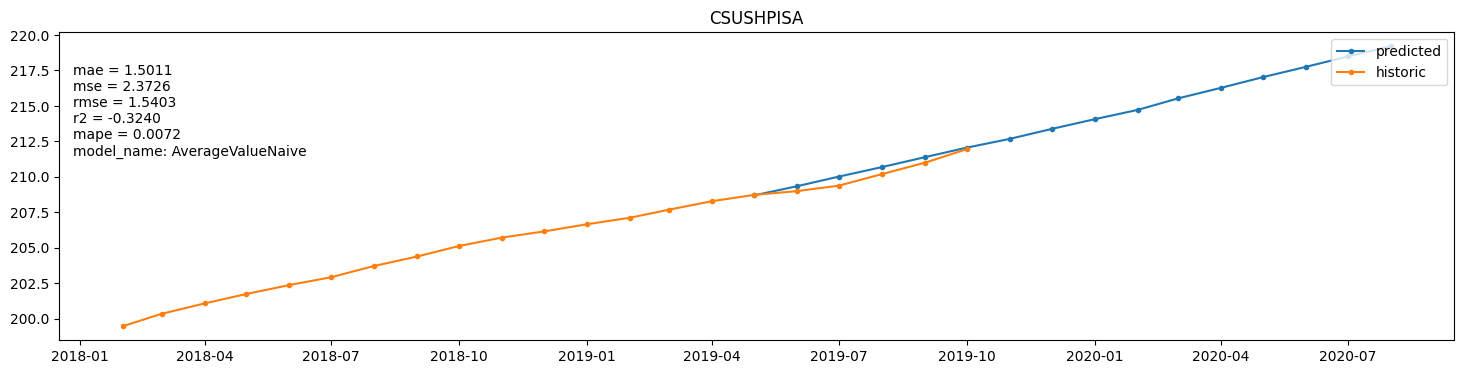

------------------------
series: EMVOVERALLEMV, best_model_name: MultivariateMotif


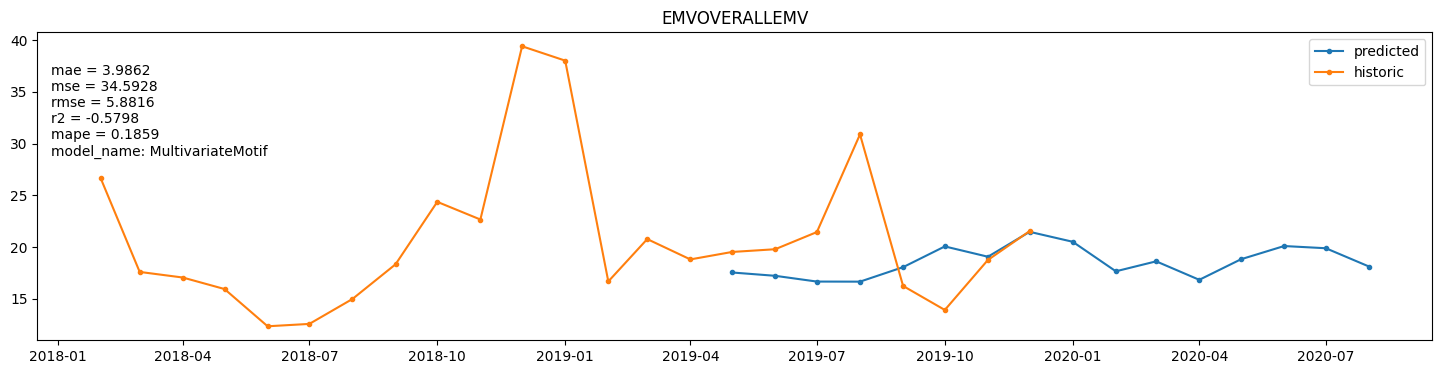

------------------------
series: USEPUINDXM, best_model_name: MultivariateMotif


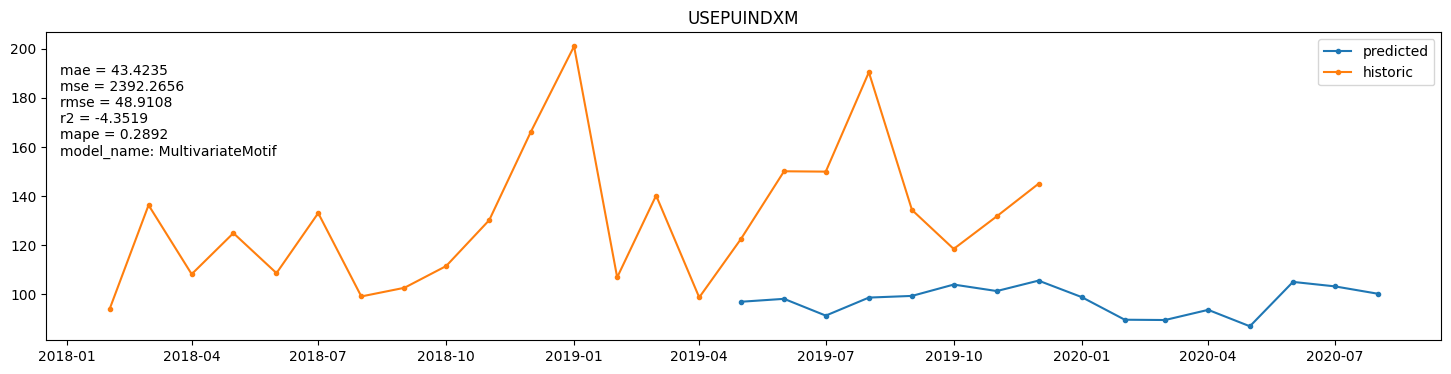

------------------------
series: EXCAUS, best_model_name: ARDL


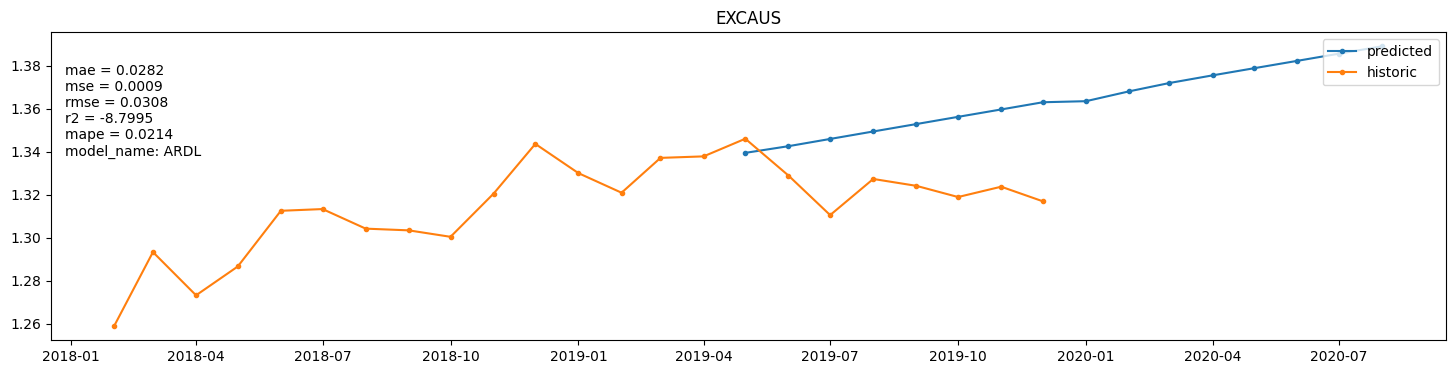

------------------------
series: EXCHUS, best_model_name: ARIMA


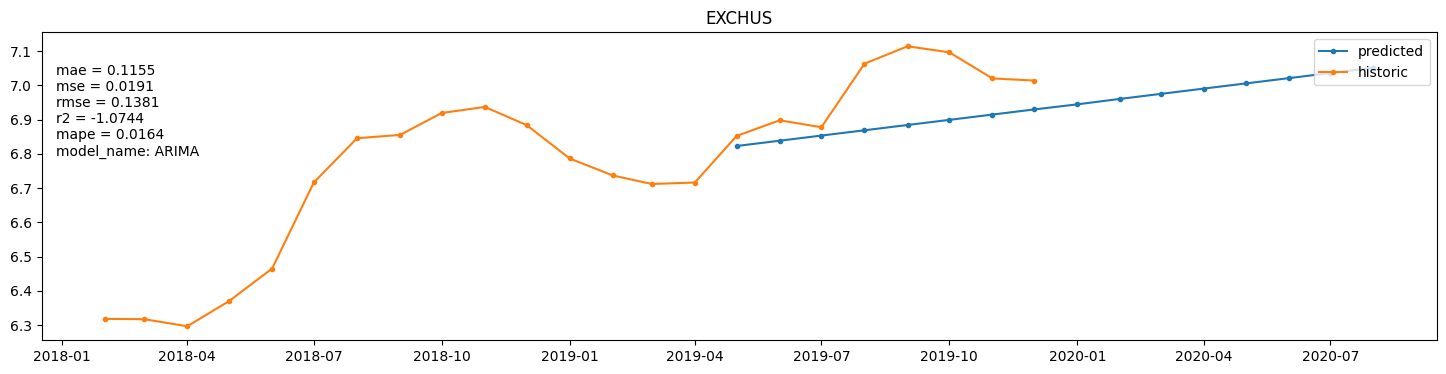

------------------------
series: EXUSEU, best_model_name: ARDL


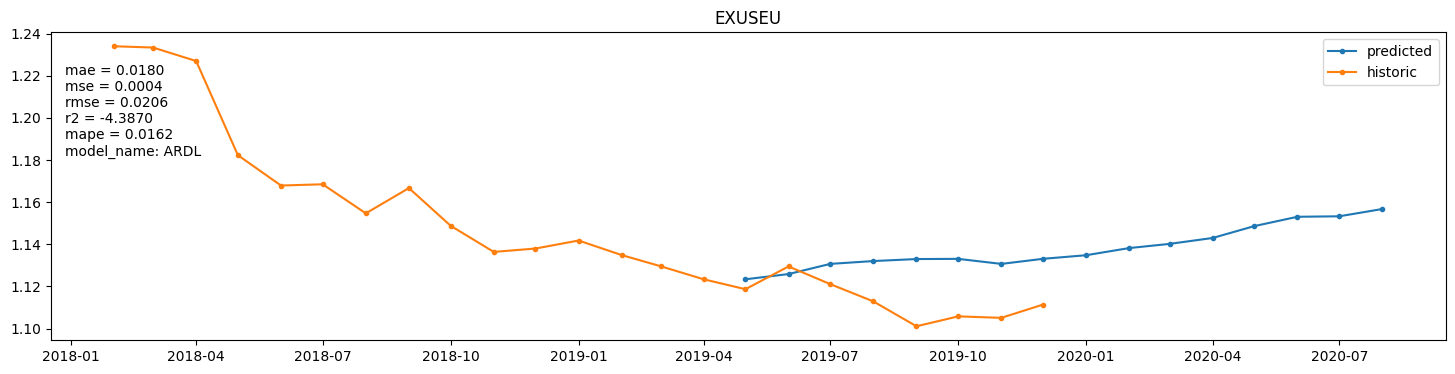

------------------------
series: GS10, best_model_name: NVAR


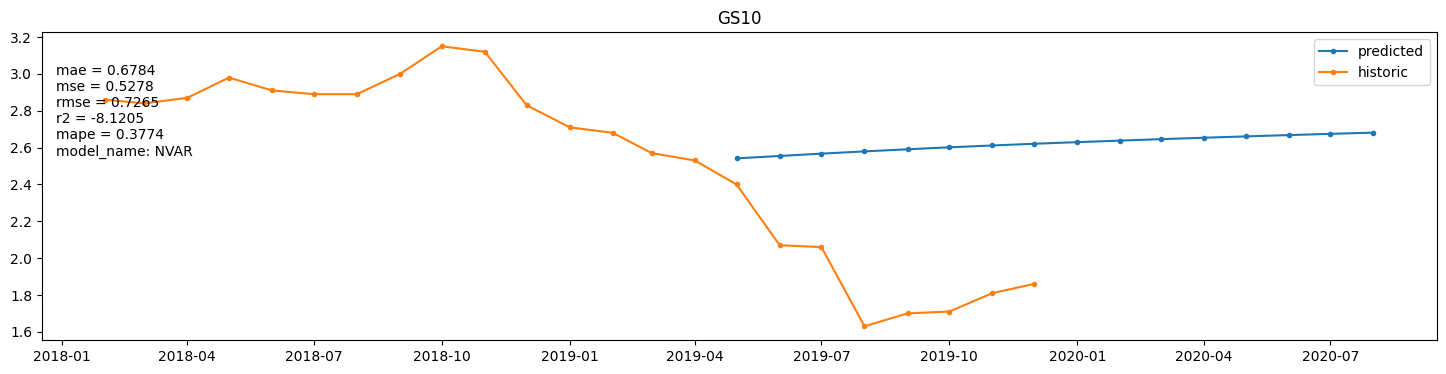

------------------------
series: MCOILWTICO, best_model_name: ARDL


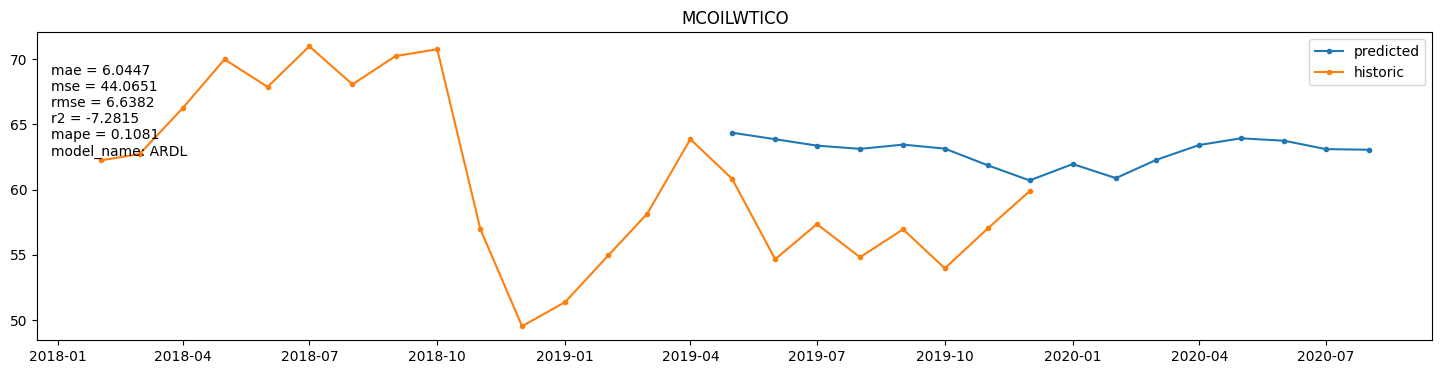

------------------------
series: T10YIEM, best_model_name: ARDL


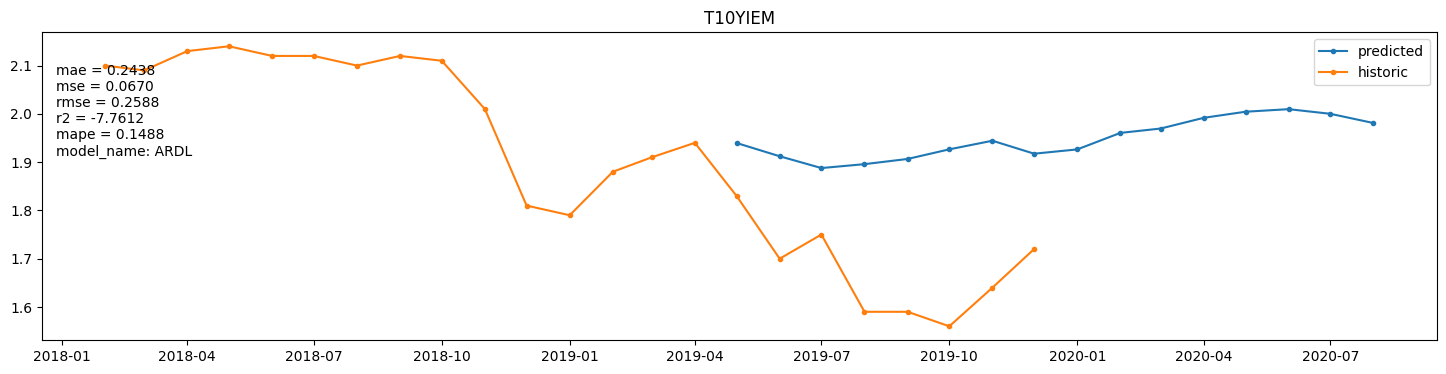

In [8]:
# @title Plot results

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))


for series in model.horizontal_to_df().Series:

  print('------------------------')

  predicted_values = forecasts_df[series].values

  actual_values = df_long_test[df_long_test['series_id']==series].value.to_list()


  mae = mean_absolute_error(actual_values, predicted_values[:8])
  mse = mean_squared_error(actual_values, predicted_values[:8])
  rmse = np.sqrt(mse)
  r2 = r2_score(actual_values, predicted_values[:8])
  mape = mean_absolute_percentage_error(actual_values, predicted_values[:8])


  # print(f"mae = {mae:.4f}")
  # print(f"mse = {mse:.4f}")
  # print(f"rmse = {rmse:.4f}")
  # print(f"r2 = {r2:.4f}")
  # print(f"mape = {mape:.4f}")

  model_id = model.horizontal_to_df()[model.horizontal_to_df().Series == series].ID.to_list()[0]

  model_results = model.results()
  model_results = model_results[model_results.ID == model_id]
  best_model_name = model_results.Model.to_list()[0]


  print(f"series: {series}, best_model_name: {best_model_name}")

  metrics = f"mae = {mae:.4f} \n" +  f"mse = {mse:.4f} \n" +  f"rmse = {rmse:.4f} \n" +  f"r2 = {r2:.4f} \n" +  f"mape = {mape:.4f} \n" + f"model_name: {best_model_name}"


  plt.figure(figsize=(18, 4))  # Width x Height in inches

  x = forecasts_df[series].index.values
  y = forecasts_df[series].values
  plt.plot(x, y, label='predicted', marker='.')

  x = df_long[(df_long['series_id']==series) & (df_long['datetime'] > '2018')].datetime.values
  y = df_long[(df_long['series_id']==series) & (df_long['datetime'] > '2018')].value.values
  plt.plot(x, y, label='historic', marker='.')


  plt.annotate(metrics, xy=(0.01, 0.6), xycoords='axes fraction', fontsize=10)
  plt.title(series.upper())
  plt.legend(loc='upper right')

  plt.show()

  # break



